In [ ]:
# 21L-5468 Hassan Muzaffar
# 21L-5284 Ahmer Zaidi
# 21L-1800 Waleed Ikram

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

## Statistical Analysis

In [5]:
df = pd.read_csv("AQI_major_cities 4.csv")

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df

City              Date   Time       Wind Humidity Weather  PM2.5  \
0           Dhaka  05 December 2024  07:00     0 km/h      88%     17°  268.0   
1         Kolkata  05 December 2024  06:30     0 km/h      82%     18°  138.8   
2          Lahore  05 December 2024  06:00     0 km/h      76%     10°  132.0   
3     Ulaanbaatar  05 December 2024  09:00   3.6 km/h      84%    -22°  119.7   
4         Karachi  05 December 2024  06:00  11.1 km/h      67%     14°  105.5   
...           ...               ...    ...        ...      ...     ...    ...   
4817      Seattle  10 December 2024  10:00   7.4 km/h      92%      2°    3.9   
4818     Brussels  10 December 2024  19:00  18.5 km/h      87%      4°    3.7   
4819     Helsinki  10 December 2024  20:00  16.1 km/h      87%      0°    3.9   
4820       Madrid  10 December 2024  19:00  14.8 km/h      54%      7°    3.0   
4821    Melbourne  11 December 2024  05:00   9.3 km/h      72%     14°    2.1   

       PM10    O₃   NO₂   SO₂       CO  AQI  
0       NaN  10.0   NaN   NaN      NaN  386  
1     278.3   8.5  36.5   9.2  1,600.0  214  
2       NaN   NaN   NaN   NaN      NaN  207  
3     205.5   0.1  53.9  89.5  3,250.0  196  
4       NaN   NaN   NaN   NaN      NaN  186  
...     ...   ...   ...   ...      ...  ...  
4817    8.0  16.0  22.1   NaN    281.2   21  
4818   10.5  38.0  16.0   NaN      NaN   21  
4819    5.5  41.9  17.1   0.1      NaN   21  
4820    7.8  28.2  21.0   2.0      NaN   17  
4821    NaN   NaN   NaN   NaN      NaN   12  

[4822 rows x 13 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      4822 non-null   object 
 1   Date      4822 non-null   object 
 2   Time      4822 non-null   object 
 3   Wind      4822 non-null   object 
 4   Humidity  4822 non-null   object 
 5   Weather   4822 non-null   object 
 6   PM2.5     4822 non-null   float64
 7   PM10      3356 non-null   float64
 8   O₃        3230 non-null   float64
 9   NO₂       3269 non-null   float64
 10  SO₂       2576 non-null   float64
 11  CO        2467 non-null   object 
 12  AQI       4822 non-null   int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 489.9+ KB


In [13]:
df.describe()

PM2.5         PM10           O₃          NO₂          SO₂  \
count  4822.000000  3356.000000  3230.000000  3269.000000  2576.000000   
mean     29.461012    39.139303    35.712291    33.419027     7.932376   
std      35.875902    49.819774    33.630769    27.771785    14.242155   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       7.700000    11.500000    11.000000    15.500000     2.000000   
50%      17.000000    22.000000    28.500000    26.000000     4.300000   
75%      35.000000    45.025000    49.375000    45.000000     8.200000   
max     303.700000   529.500000   223.400000   249.700000   162.000000   

               AQI  
count  4822.000000  
mean     80.710701  
std      54.667613  
min       6.000000  
25%      44.000000  
50%      66.000000  
75%      99.000000  
max     457.000000

***Data Cleaning and Data Transformation***

In [16]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(['Date', 'Time'], axis=1)

In [18]:
df['CO'] = pd.to_numeric(df['CO'], errors='coerce')
df['Wind'] = df['Wind'].str.replace(' km/h', '').astype(float)
df['Humidity'] = df['Humidity'].str.replace('%', '').astype(float) / 100
df['Weather'] = df['Weather'].str.replace('°', '').astype(int)

In [20]:
df.head(10)

City  Wind  Humidity  Weather  PM2.5   PM10    O₃   NO₂   SO₂  \
0        Dhaka   0.0      0.88       17  268.0    NaN  10.0   NaN   NaN   
1      Kolkata   0.0      0.82       18  138.8  278.3   8.5  36.5   9.2   
2       Lahore   0.0      0.76       10  132.0    NaN   NaN   NaN   NaN   
3  Ulaanbaatar   3.6      0.84      -22  119.7  205.5   0.1  53.9  89.5   
4      Karachi  11.1      0.67       14  105.5    NaN   NaN   NaN   NaN   
5      Kampala   4.9      0.70       16  100.5    4.7  29.9  15.1   0.0   
6        Cairo   0.0      0.72       16   96.3    NaN   NaN   NaN   NaN   
7        Hanoi  11.6      0.70       20   84.0  103.7  12.9  40.8   NaN   
8        Delhi   5.5      0.66       11   73.4  126.0   9.1  43.0   7.6   
9      Baghdad   9.3      0.66        7   73.0    NaN   NaN   NaN   NaN   

      CO  AQI            datetime  
0    NaN  386 2024-12-05 07:00:00  
1    NaN  214 2024-12-05 06:30:00  
2    NaN  207 2024-12-05 06:00:00  
3    NaN  196 2024-12-05 09:00:00  
4    NaN  186 2024-12-05 06:00:00  
5    NaN  183 2024-12-05 03:00:00  
6    NaN  180 2024-12-05 03:00:00  
7  725.6  171 2024-12-05 08:00:00  
8  825.0  164 2024-12-05 06:30:00  
9    NaN  163 2024-12-05 04:00:00

In [22]:
df.tail(10)

City  Wind  Humidity  Weather  PM2.5  PM10    O₃   NO₂  SO₂     CO  \
4812     Bogota  11.1      0.55       17    4.8  24.0  19.7   NaN  NaN    NaN   
4813     Dublin  14.8      0.73        6    5.5  10.5  11.9  30.1  2.6    NaN   
4814  Vancouver   7.4      0.96        3    5.1   NaN   2.6  39.8  3.9    NaN   
4815   Canberra   0.0      0.86       14    4.1  10.7  42.0   NaN  NaN    NaN   
4816       Kobe   7.5      0.58        5    5.0   6.0   NaN   7.5  0.0  229.0   
4817    Seattle   7.4      0.92        2    3.9   8.0  16.0  22.1  NaN  281.2   
4818   Brussels  18.5      0.87        4    3.7  10.5  38.0  16.0  NaN    NaN   
4819   Helsinki  16.1      0.87        0    3.9   5.5  41.9  17.1  0.1    NaN   
4820     Madrid  14.8      0.54        7    3.0   7.8  28.2  21.0  2.0    NaN   
4821  Melbourne   9.3      0.72       14    2.1   NaN   NaN   NaN  NaN    NaN   

      AQI            datetime  
4812   27 2024-12-10 13:00:00  
4813   31 2024-12-10 18:00:00  
4814   28 2024-12-10 10:00:00  
4815   22 2024-12-11 05:00:00  
4816   28 2024-12-11 03:00:00  
4817   21 2024-12-10 10:00:00  
4818   21 2024-12-10 19:00:00  
4819   21 2024-12-10 20:00:00  
4820   17 2024-12-10 19:00:00  
4821   12 2024-12-11 05:00:00

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   City      4822 non-null   object        
 1   Wind      4822 non-null   float64       
 2   Humidity  4822 non-null   float64       
 3   Weather   4822 non-null   int64         
 4   PM2.5     4822 non-null   float64       
 5   PM10      3356 non-null   float64       
 6   O₃        3230 non-null   float64       
 7   NO₂       3269 non-null   float64       
 8   SO₂       2576 non-null   float64       
 9   CO        2174 non-null   float64       
 10  AQI       4822 non-null   int64         
 11  datetime  4822 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 452.2+ KB


In [26]:
df.describe()

Wind     Humidity      Weather        PM2.5         PM10  \
count  4822.000000  4822.000000  4822.000000  4822.000000  3356.000000   
mean     11.573725     0.716869    11.197428    29.461012    39.139303   
min       0.000000     0.050000   -27.000000     0.000000     0.000000   
25%       5.500000     0.590000     3.000000     7.700000    11.500000   
50%       9.300000     0.770000    10.000000    17.000000    22.000000   
75%      16.700000     0.870000    20.000000    35.000000    45.025000   
max      63.000000     1.000000    34.000000   303.700000   529.500000   
std       8.740096     0.193959    10.537948    35.875902    49.819774   

                O₃          NO₂          SO₂           CO          AQI  \
count  3230.000000  3269.000000  2576.000000  2174.000000  4822.000000   
mean     35.712291    33.419027     7.932376   399.193974    80.710701   
min       0.000000     0.000000     0.000000     0.000000     6.000000   
25%      11.000000    15.500000     2.000000   229.000000    44.000000   
50%      28.500000    26.000000     4.300000   379.500000    66.000000   
75%      49.375000    45.000000     8.200000   572.500000    99.000000   
max     223.400000   249.700000   162.000000   996.800000   457.000000   
std      33.630769    27.771785    14.242155   252.584719    54.667613   

                            datetime  
count                           4822  
mean   2024-12-08 10:21:04.703442688  
min              2024-12-04 17:00:00  
25%              2024-12-07 07:00:00  
50%              2024-12-08 02:00:00  
75%              2024-12-09 20:41:15  
max              2024-12-11 07:00:00  
std                              NaN

In [28]:
df.describe(include=['object'])

City
count    4822
unique    126
top     Delhi
freq       55

In [30]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['City'], dtype='object')


In [32]:
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
Index(['Wind', 'Humidity', 'Weather', 'PM2.5', 'PM10', 'O₃', 'NO₂', 'SO₂',
       'CO', 'AQI'],
      dtype='object')


***Handling Missing Values***

In [35]:
df.isnull().sum()

City           0
Wind           0
Humidity       0
Weather        0
PM2.5          0
PM10        1466
O₃          1592
NO₂         1553
SO₂         2246
CO          2648
AQI            0
datetime       0
dtype: int64

In [37]:
# Replace missing values in numerical columns with 0
df[['PM2.5', 'PM10', 'O₃', 'NO₂', 'SO₂', 'CO']] = df[['PM2.5', 'PM10', 'O₃', 'NO₂', 'SO₂', 'CO']].fillna(0)

We are replacing the missing values with zero.As we are scrapping the data from IQAir website,so lets take an example of Lahore the website only provide values of PM2.5 , Wind, Temparature, Humdidity. But does not provide the other pollutants value so this mean that IQAir is also predicting AQI only on the basis of provided values.

In [40]:
df.isnull().sum()

City        0
Wind        0
Humidity    0
Weather     0
PM2.5       0
PM10        0
O₃          0
NO₂         0
SO₂         0
CO          0
AQI         0
datetime    0
dtype: int64

***Handling Duplicates***

In [43]:
duplicates = df[df.duplicated()]

In [45]:
duplicates

City  Wind  Humidity  Weather  PM2.5  PM10    O₃   NO₂   SO₂  \
299        Chengdu  10.8      0.62        9   25.0  43.0  37.0  30.0   4.0   
351        Seattle   7.4      0.89        3    7.0  10.0   9.4  27.1   0.3   
554          Dhaka   0.0      0.72       18  116.9   0.0  14.0   0.0   0.0   
649          Osaka  11.1      0.70        5    7.0   9.0   0.0  18.8  10.5   
680        Karachi   7.4      0.59       17  105.0   0.0   0.0   0.0   0.0   
...            ...   ...       ...      ...    ...   ...   ...   ...   ...   
4481        Manila   3.7      0.86       26   21.2   0.0   0.0   0.0   0.0   
4484      Belgrade   9.3      0.87        6   20.4  35.1   7.3  23.3  22.5   
4512          Lyon  14.8      0.80        4   11.1  14.3  24.4  20.9   6.3   
4514  Johannesburg   5.5      0.34       27    4.0  61.6   0.0   0.0   0.0   
4549     Rotterdam  27.8      0.85        5    5.3  10.4  45.6  10.2   0.0   

         CO  AQI            datetime  
299   400.0   81 2024-12-06 23:00:00  
351   266.1   38 2024-12-06 08:00:00  
554     0.0  194 2024-12-07 00:00:00  
649   343.5   39 2024-12-07 04:00:00  
680     0.0  186 2024-12-07 00:00:00  
...     ...  ...                 ...  
4481    0.0   74 2024-12-10 21:00:00  
4484  710.0   72 2024-12-10 14:00:00  
4512    0.3   55 2024-12-10 14:00:00  
4514    0.0   54 2024-12-10 15:00:00  
4549    0.0   29 2024-12-10 14:00:00  

[327 rows x 12 columns]

In [47]:
df = df.drop_duplicates()

In [49]:
duplicates = df[df.duplicated()]

In [51]:
duplicates

Empty DataFrame
Columns: [City, Wind, Humidity, Weather, PM2.5, PM10, O₃, NO₂, SO₂, CO, AQI, datetime]
Index: []

In [53]:
df.shape

(4495, 12)

***Handling Outliers***

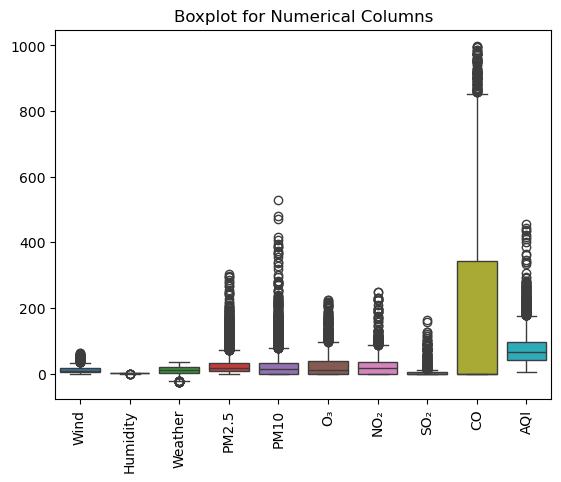

In [56]:
# Create a boxplot for each numerical column to visually detect outliers
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplot for Numerical Columns")
plt.xticks(rotation=90)
plt.show()

In [58]:
numerical_col = df.select_dtypes(include=["number"]).columns

for col in numerical_col:
    if col == 'AQI':
        continue  # Skip AQI column
    else:
        skewness = df[col].skew()
        print(f"Skewness of {col}: {skewness}")
        
        if abs(skewness) < 0.1:  # If skewness is near 0, use Z-score method
            print(f"Finding outliers in {col} using Z-score method")
            mean = df[col].mean()
            std_dev = df[col].std()
            
            # Identify outliers (Z-scores < -3 or > 3)
            df = df[((df[col] - mean) / std_dev).abs() < 3]
        else:
            print(f"Finding outliers in {col} using IQR method")
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            threshold = 1.5 * IQR
            lower_bound = Q1 - threshold
            upper_bound = Q3 + threshold
            print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
            
            # Remove outliers using IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
        print(f"After processing {col}:")
        print(df.shape)

# Final dataset shape
print(f"Final dataset shape after outlier removal: {df.shape}")


Skewness of Wind: 1.4620160071450743
Finding outliers in Wind using IQR method
IQR: 11.2, Lower Bound: -11.299999999999997, Upper Bound: 33.5
After processing Wind:
(4387, 12)
Skewness of Humidity: -0.7175232486270529
Finding outliers in Humidity using IQR method
IQR: 0.28, Lower Bound: 0.16999999999999993, Upper Bound: 1.29
After processing Humidity:
(4380, 12)
Skewness of Weather: -0.138744104723045
Finding outliers in Weather using IQR method
IQR: 17.0, Lower Bound: -22.5, Upper Bound: 45.5
After processing Weather:
(4362, 12)
Skewness of PM2.5: 2.8495308191744075
Finding outliers in PM2.5 using IQR method
IQR: 25.575, Lower Bound: -30.437499999999996, Upper Bound: 71.8625
After processing PM2.5:
(3928, 12)
Skewness of PM10: 2.0822162436806466
Finding outliers in PM10 using IQR method
IQR: 29.0, Lower Bound: -43.5, Upper Bound: 72.5
After processing PM10:
(3738, 12)
Skewness of O₃: 2.217777010428494
Finding outliers in O₃ using IQR method
IQR: 37.875, Lower Bound: -56.8125, Upper Bo

***Feature Engineering***

In [61]:
bins = [0, 50, 100, 150, 200, 300, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy for sensitive groups', 'Unhealthy', 'Very unhealthy', 'Hazardous']

df['AQI_Category'] = pd.cut(df['AQI'], bins=bins, labels=labels, right=False)

In [63]:
print(df[['AQI', 'AQI_Category']])

      AQI                    AQI_Category
12    147  Unhealthy for sensitive groups
13    146  Unhealthy for sensitive groups
15    138  Unhealthy for sensitive groups
16    135  Unhealthy for sensitive groups
17    129  Unhealthy for sensitive groups
...   ...                             ...
4817   21                            Good
4818   21                            Good
4819   21                            Good
4820   17                            Good
4821   12                            Good

[3280 rows x 2 columns]


In [65]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['City', 'AQI_Category'], dtype='object')


***Creating CSV of cleaned Data***

In [68]:
df.to_csv('cleaned_AQI_major_cities_.csv')

The above CSV file is used for Creating Dashboard on Tableau.

***Encoding***

In [358]:
label_encoder = LabelEncoder()
df['City_encoded'] = label_encoder.fit_transform(df['City'])

As there are 126 cities unique cities in our dataset.Since the 'City' column is a categorical variable with no natural order, we convert it into numbers using label encoding. This allows machine learning models to process it. Unlike one-hot encoding, label encoding keeps the feature space smaller, reducing computational overhead while maintaining model performance

***Scaling***

In [368]:
numerical_col = df.select_dtypes(include=["number"]).columns
scaler = StandardScaler()
df_ = df.copy()
df_[numerical_col] = scaler.fit_transform(df_[numerical_col])

In [370]:
print(df_)

             City      Wind  Humidity   Weather     PM2.5      PM10        O₃  \
12         Tehran -0.588302 -1.710995 -0.911135  2.624902 -0.902114 -0.881122   
13          Kabul -0.863825 -1.923350 -1.010385  2.610770 -0.902114 -0.881122   
15    Kuwait City -1.349270 -0.649220  0.478368  2.377590 -0.902114 -0.881122   
16       Tashkent -0.102857  0.677998 -1.109635  2.299864 -0.902114 -0.532312   
17         Yangon -1.073747  0.784176  1.272370  2.130278 -0.902114 -0.881122   
...           ...       ...       ...       ...       ...       ...       ...   
4817      Seattle -0.588302  0.996531 -0.911135 -0.915189 -0.429249 -0.183503   
4818     Brussels  0.868033  0.731087 -0.712635 -0.929321 -0.281479  0.775724   
4819     Helsinki  0.553150  0.731087 -1.109635 -0.915189 -0.577020  0.945769   
4820       Madrid  0.382588 -1.020841 -0.414884 -0.978784 -0.441071  0.348432   
4821    Melbourne -0.339020 -0.065244  0.279867 -1.042378 -0.902114 -0.881122   

           NO₂       SO₂   

## Data Visualization

**1. Univariate Analysis**

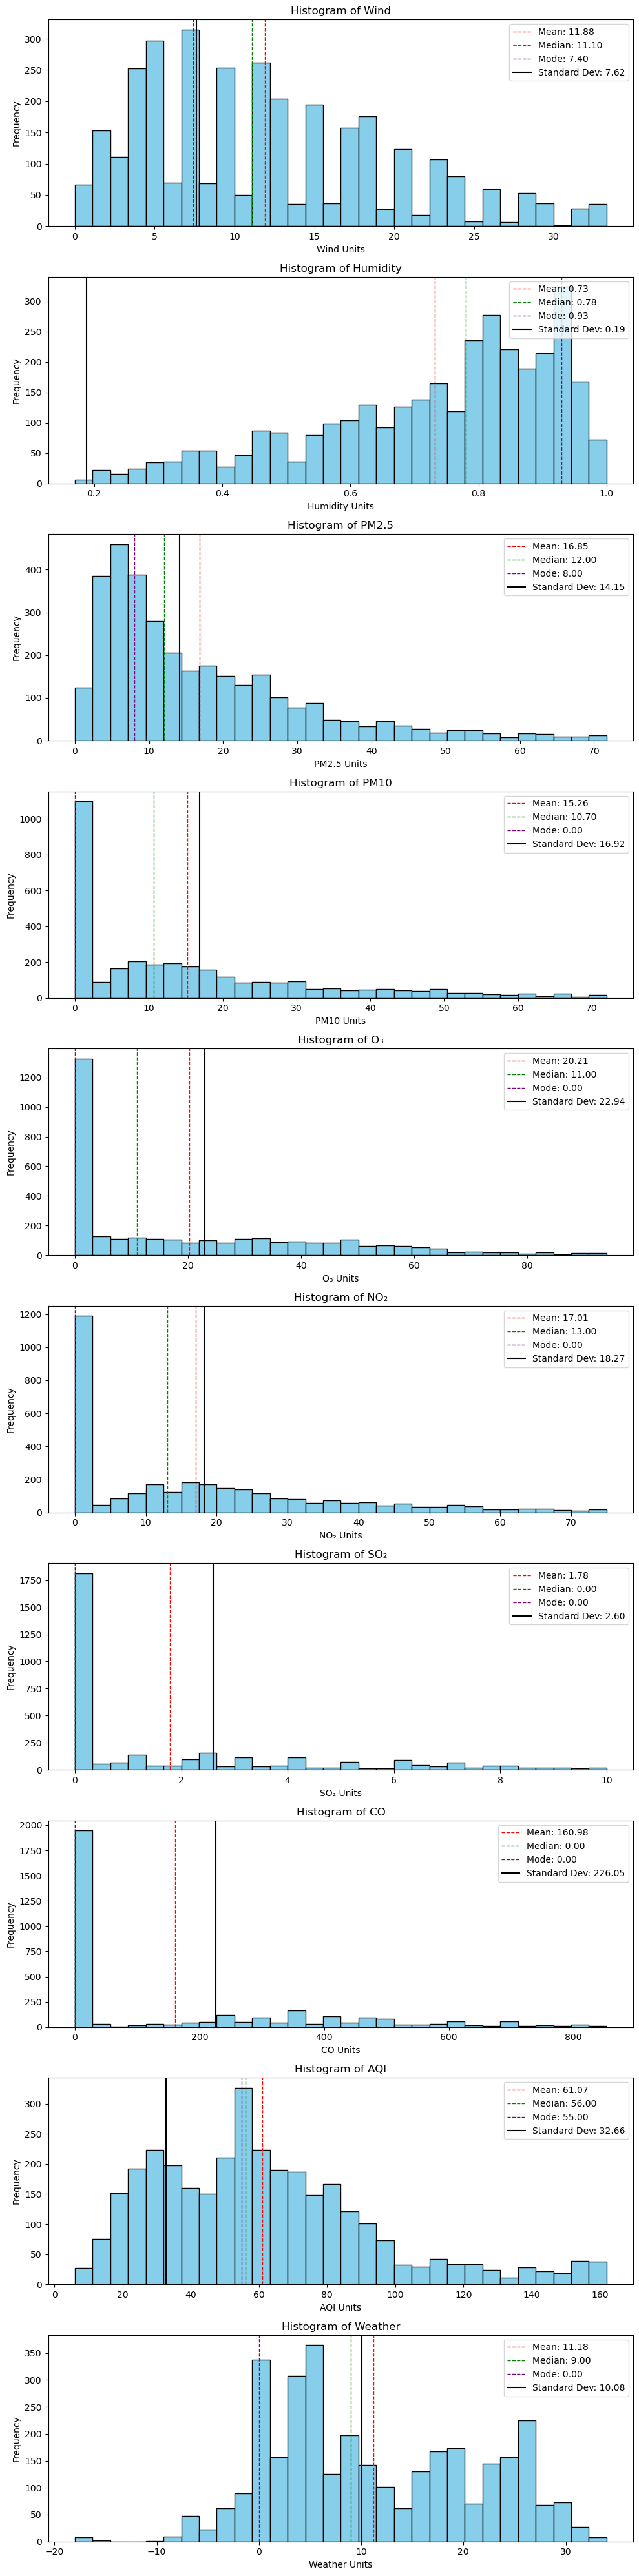

In [78]:
# List of numerical columns
num_columns = ['Wind', 'Humidity', 'PM2.5', 'PM10', 'O₃', 'NO₂', 'SO₂', 'CO', 'AQI','Weather']

plt.figure(figsize=(10, 40))  # Increased figure size for better display
for i, col in enumerate(num_columns):
    plt.subplot(len(num_columns), 1, i + 1)
    
    # Plot histogram
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(f'{col} Units')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    
    # Calculate and display statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0]  # Mode might return multiple values, so we select the first
    std_dev = df[col].std()
    
    # Display statistics on the plot
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='dashed', linewidth=1, label=f'Mode: {mode_val:.2f}')
    plt.axvline(std_dev, color='black', linestyle='-', label=f'Standard Dev: {std_dev:.2f}')
    
    # Display legend with stats
    plt.legend(loc='upper right')
    
    plt.tight_layout()  # Adjust layout for better display

plt.show()

**Wind:** Distribution of wind speeds recorded across different times and locations.

**Humidity:** Distribution of humidity levels across the dataset.

**PM2.5 (Particulate Matter):** The concentration of fine particulate matter (PM2.5) in the air.

**PM10 (Particulate Matter):** The concentration of coarse particulate matter (PM10) in the air.

**O₃ (Ozone):** The concentration of ground-level ozone (O₃), a key component of smog.

**NO₂ (Nitrogen Dioxide):** Distribution of nitrogen dioxide concentration, a major air pollutant.

**SO₂ (Sulfur Dioxide):** Distribution of sulfur dioxide concentration, often linked to industrial.

**CO (Carbon Monoxide):** Distribution of carbon monoxide (CO) concentration, often linked to vehicle emissions and combustion.

**AQI (Air Quality Index):** The overall Air Quality Index (AQI) derived from all pollutants.

**Each Histogram shows**

Symmetry: A normal distribution (bell-shaped curve) indicates balanced and stable values, while skewed distributions reveal outliers or rare extreme events.

Skewness: Right-skewed data means extreme events (like pollution spikes) occur occasionally. Left-skewed data means extreme events happen frequently.

Peaks: The peak (mode) shows the most common value in the dataset for that feature.

Outliers: Check for extreme points outside the main concentration of data, as these may indicate significant events like wildfires, storms, or traffic congestion.

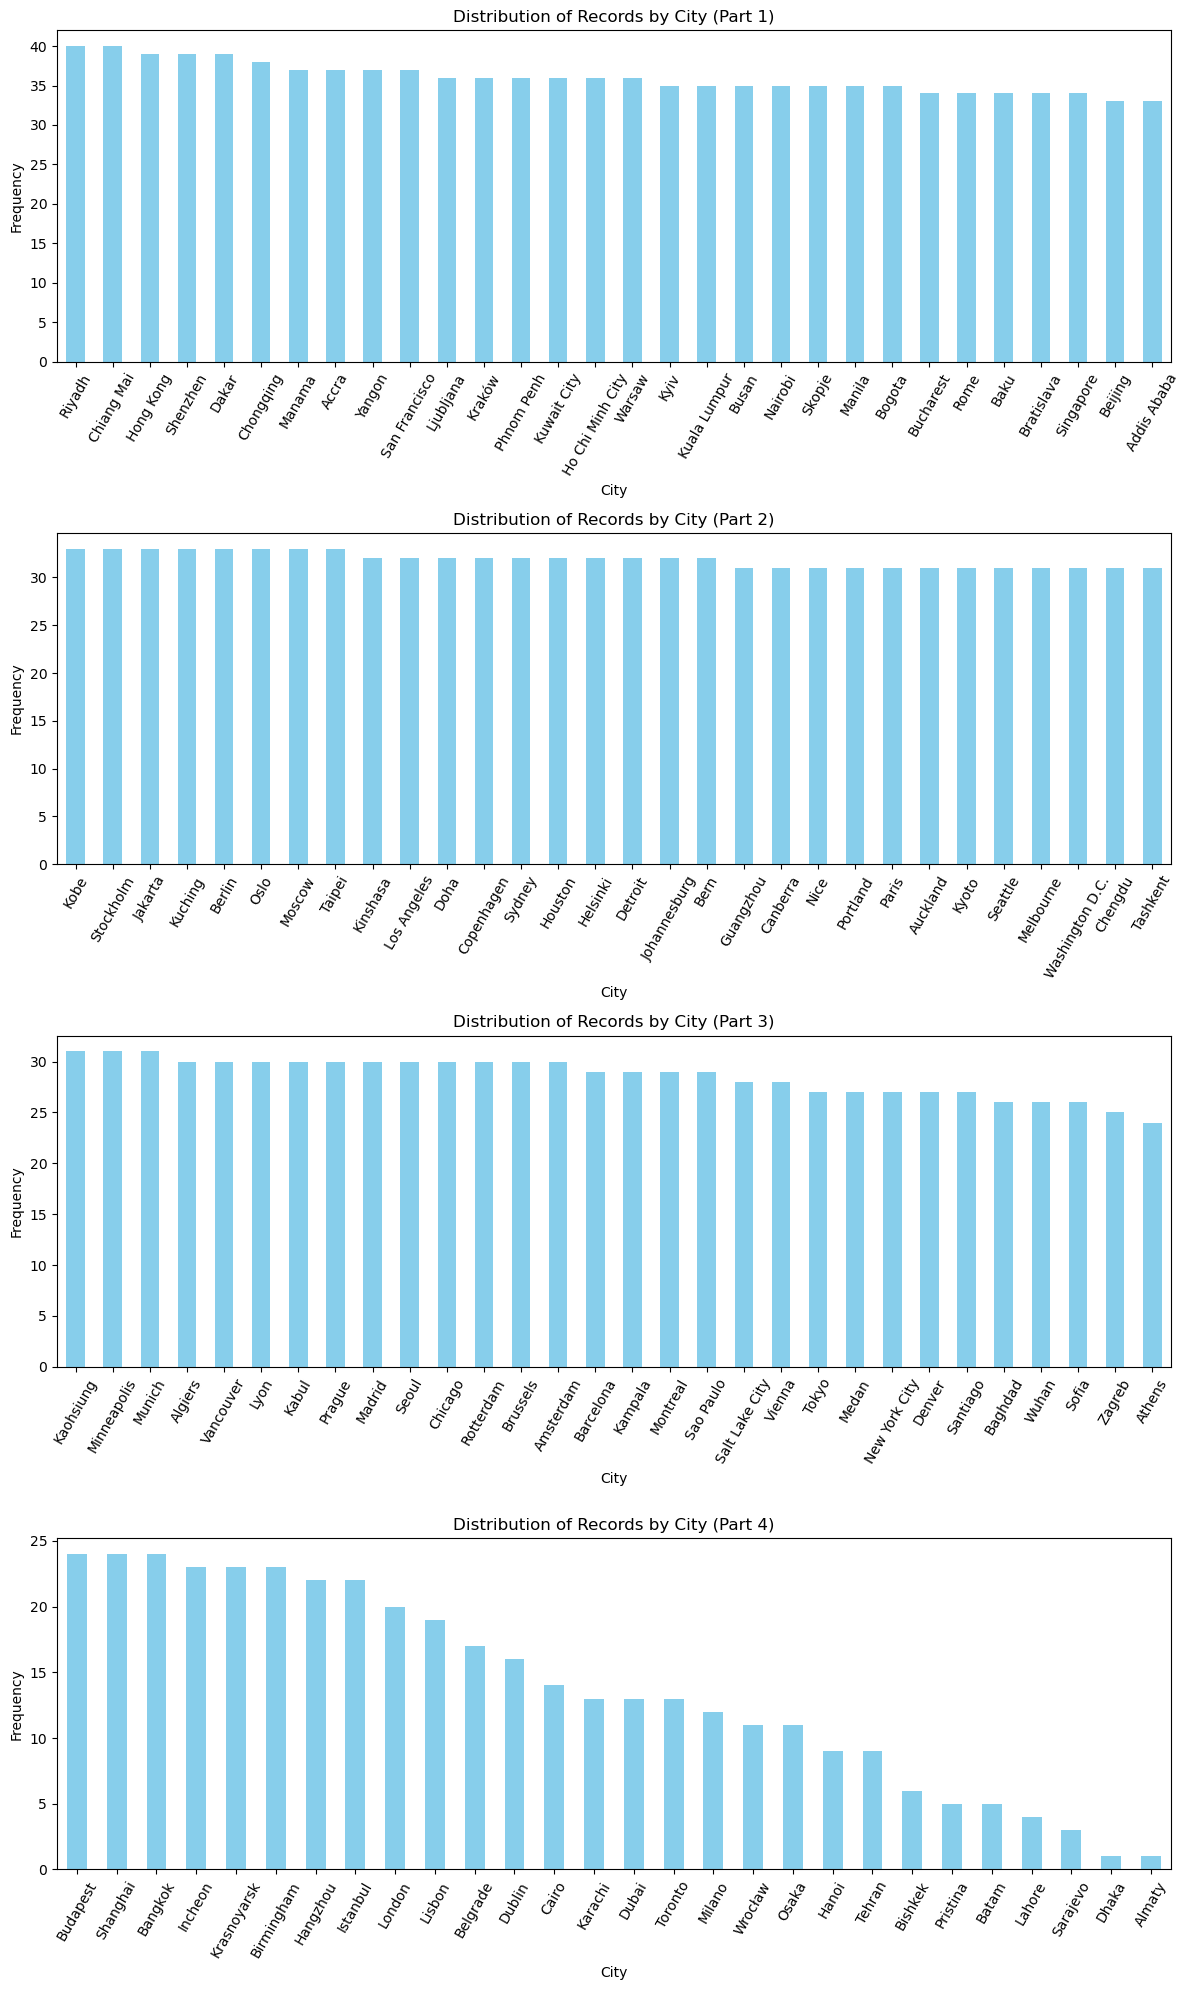

In [380]:
city_counts = df['City'].value_counts()
num_plots = 4 
num_cities_per_plot = len(city_counts) // num_plots + (len(city_counts) % num_plots > 0)

# Create subplots
plt.figure(figsize=(12, 20))
for i in range(num_plots):
    plt.subplot(num_plots, 1, i + 1)
    subset = city_counts[i*num_cities_per_plot:(i+1)*num_cities_per_plot]
    subset.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of Records by City (Part {i+1})')
    plt.xlabel('City')
    plt.ylabel('Frequency')
    plt.xticks(rotation=60)
    plt.tight_layout()

plt.show()

Each bar represents a city, and the height of the bar corresponds to the number of data records available for that city.Since there are many cities, the records are divided into 4 separate plots for better visualization.

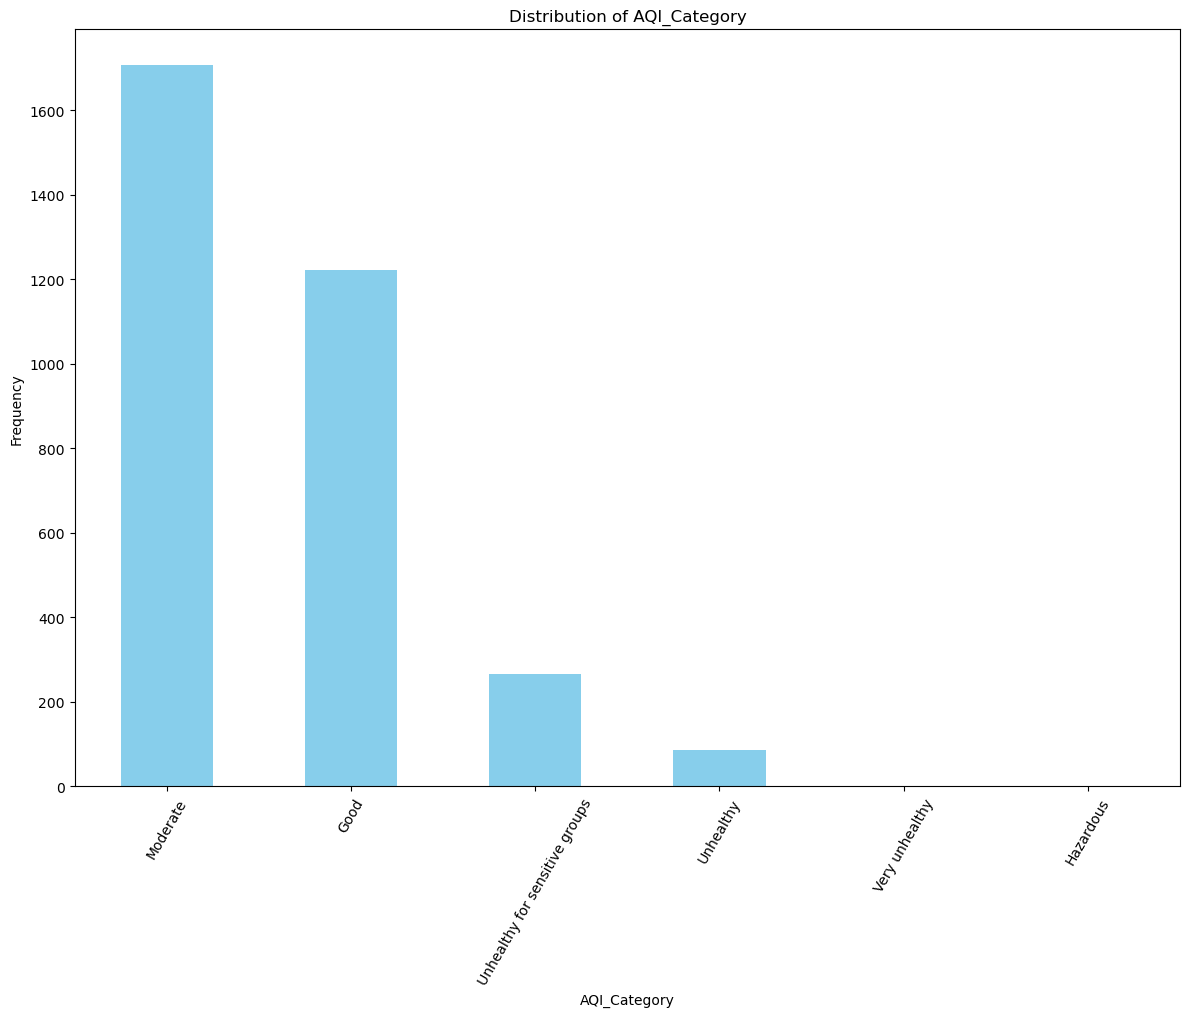

In [383]:
plt.figure(figsize=(12, 18))

for i, col in enumerate(categorical_columns):
    if col != 'City':
        plt.subplot(len(categorical_columns), 1, i+1)
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=60)
        plt.tight_layout()

plt.show()

This univariate analysis visualizes the distribution of AQI categories in the dataset. It shows the frequency of each AQI category, helping identify which air quality levels (like "Good," "Moderate," or "Unhealthy") are most common in the data.

**2. Bivariate and Multivariate Analysis:**

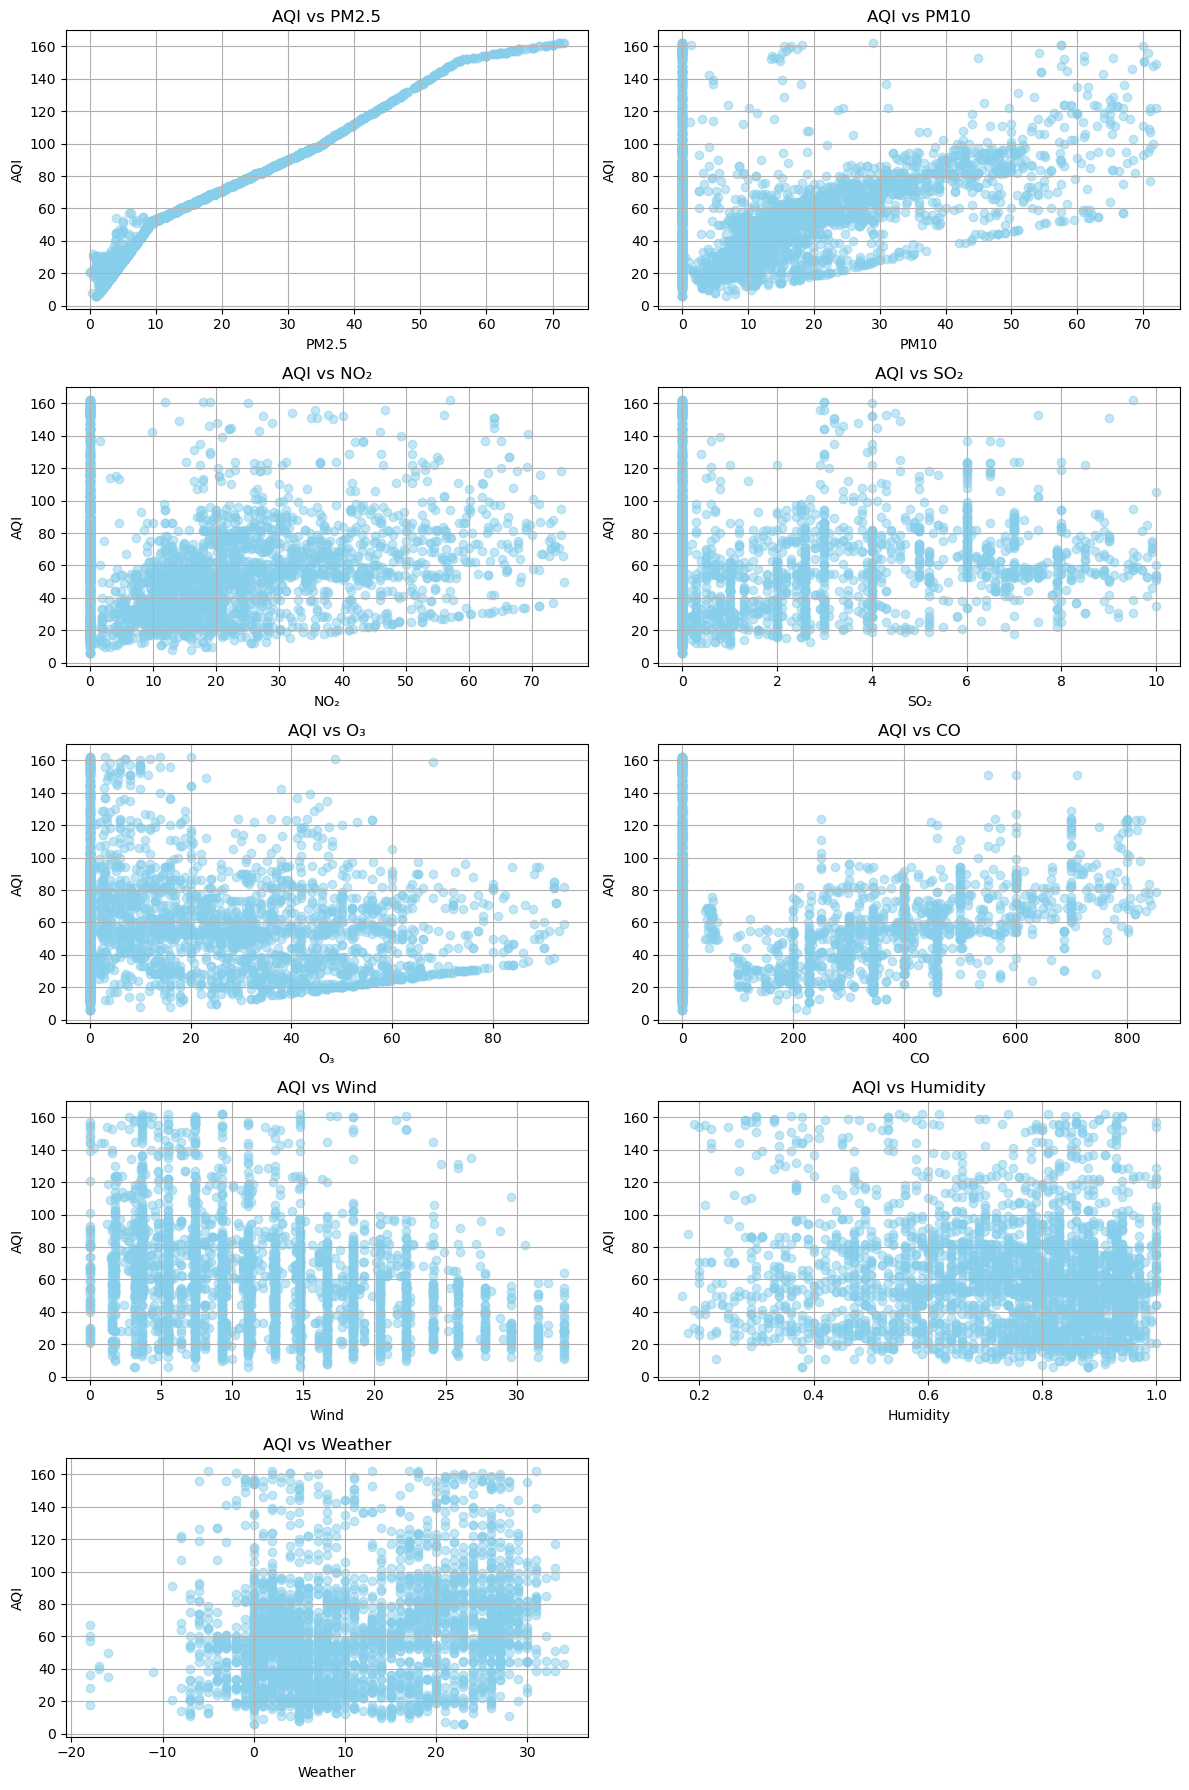

In [86]:
# Bivariate Analysis: Scatter plots of key pollutants against AQI
pollutants = ['PM2.5', 'PM10', 'NO₂', 'SO₂' , 'O₃', 'CO','Wind', 'Humidity','Weather']

plt.figure(figsize=(12, 18))
for i, pollutant in enumerate(pollutants):
    plt.subplot(5, 2, i+1)
    plt.scatter(df[pollutant], df['AQI'], alpha=0.5, color='skyblue')
    plt.title(f'AQI vs {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('AQI')
    plt.grid(True)

plt.tight_layout()
plt.show()

This bivariate analysis visualizes the relationship between key pollutants (PM2.5, PM10, NO₂, SO₂, O₃, and CO) and the Air Quality Index (AQI) using scatter plots. Each plot shows how changes in the concentration of a specific pollutant affect AQI. Patterns or trends, such as positive correlations, can be identified, indicating which pollutants have the most significant impact on AQI.

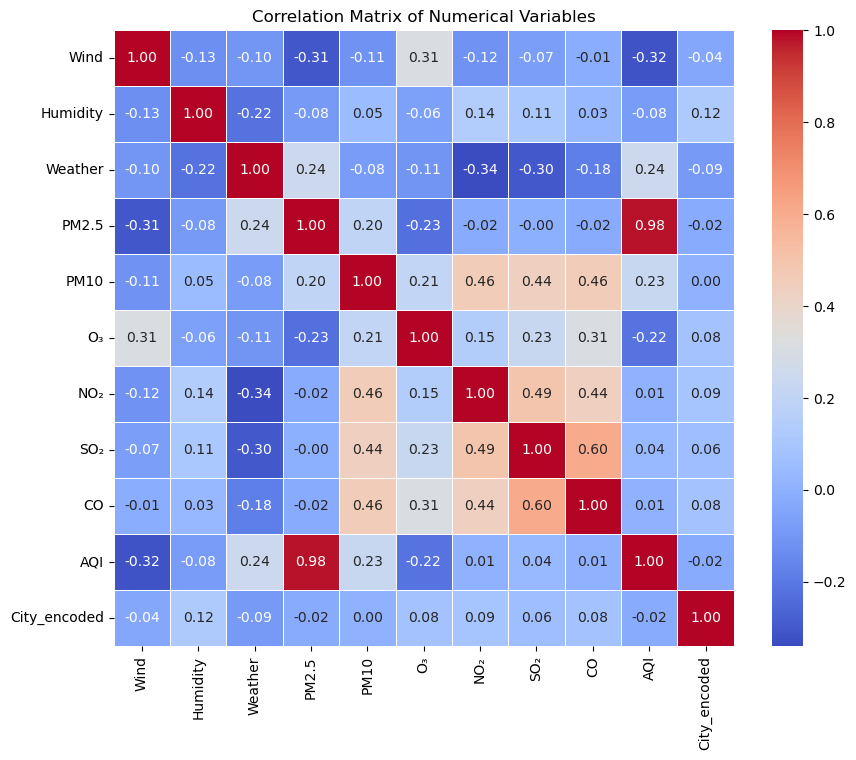

In [392]:
# Correlation Matrix
numerical_col = df.select_dtypes(include=["number"]).columns
correlation_matrix = df[numerical_col].corr()

# Displaying the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

***Here are key points derived from the correlation matrix analysis:***

**PM2.5 and AQI**: Strong positive correlation (0.98), indicating that PM2.5 levels significantly influence AQI.

**PM10 and AQI**: Moderate positive correlation (0.46), suggesting PM10 contributes to AQI but less than PM2.5.

**SO₂ and AQI**: Weak positive correlation (0.04), indicating a minimal direct relationship with AQI.

**NO₂ and AQI**: Minimal correlation (0.01), suggesting that NO₂ has little influence on AQI in this dataset.

**O₃ and AQI**: Weak negative correlation (-0.22), implying higher O₃ levels may slightly reduce AQI.

**CO and AQI**: Negligible correlation (0.01), showing minimal impact on AQI.

**PM2.5 and PM10**: Strong positive correlation (0.46), showing that these pollutants often increase together.

**SO₂ and NO₂**: Moderate positive correlation (0.49), suggesting a common source or similar behavior.

**Wind and PM2.5/O₃**: Negative correlation (-0.31, -0.31), indicating higher wind speeds reduce these pollutant concentrations, likely due to dispersion.

**Weather and AQI**: Moderate positive correlation (0.24), suggesting temperature impacts AQI moderately.

**City_encoded and AQI**: Negligible correlation (-0.02), indicating that city encoding does not directly influence AQI values.

**Humidity and Pollutants**: Negligible correlations with most pollutants, showing limited influence of humidity on pollutant levels.

**Insights:**
1. PM2.5 is the most significant pollutant affecting AQI in this dataset.
2. The relationship between pollutants varies, with some showing strong dependencies, while others are weakly related.
3. Meteorological factors like wind and weather influence pollutant levels differently.

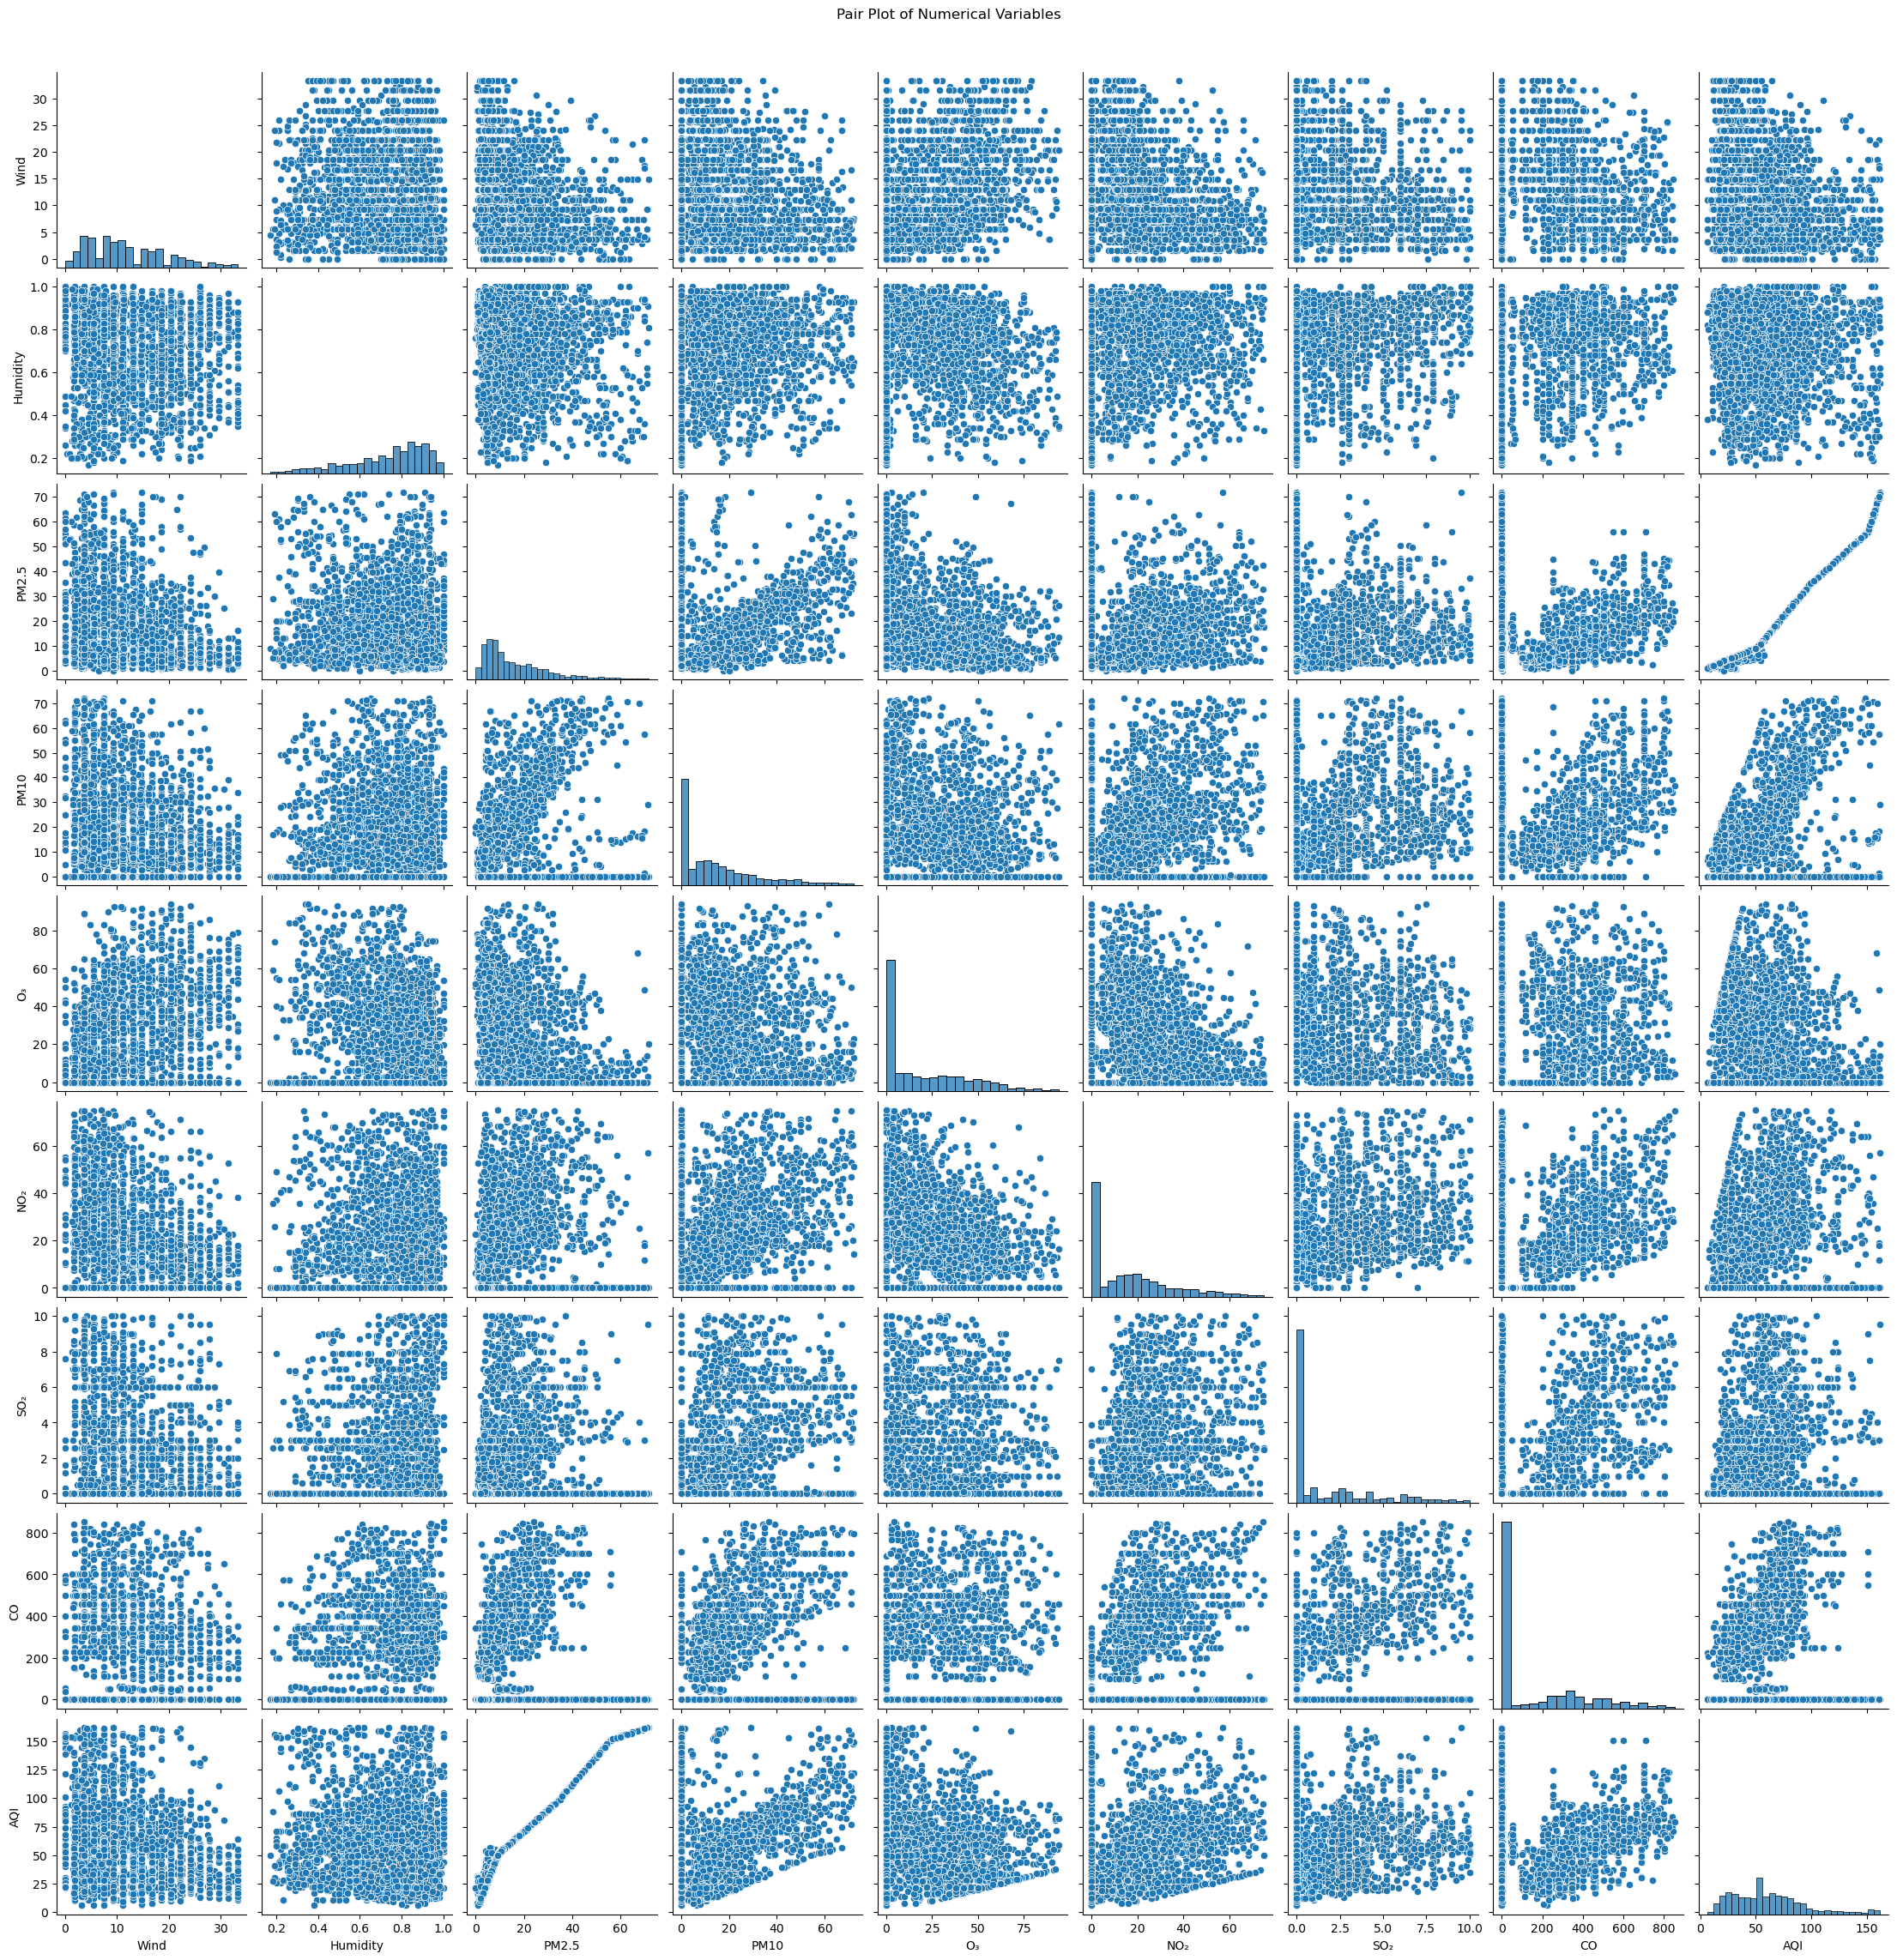

In [395]:
# Pair Plot for multivariate analysis
sns.pairplot(df[num_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)  # Adjust title position
plt.show()

The pair plot visualizes the relationships between pairs of numerical variables in the dataset. It helps identify potential correlations, patterns, and clusters among variables like PM2.5, AQI, and others. This analysis can reveal insights into how different pollutants and weather factors interact with each other.

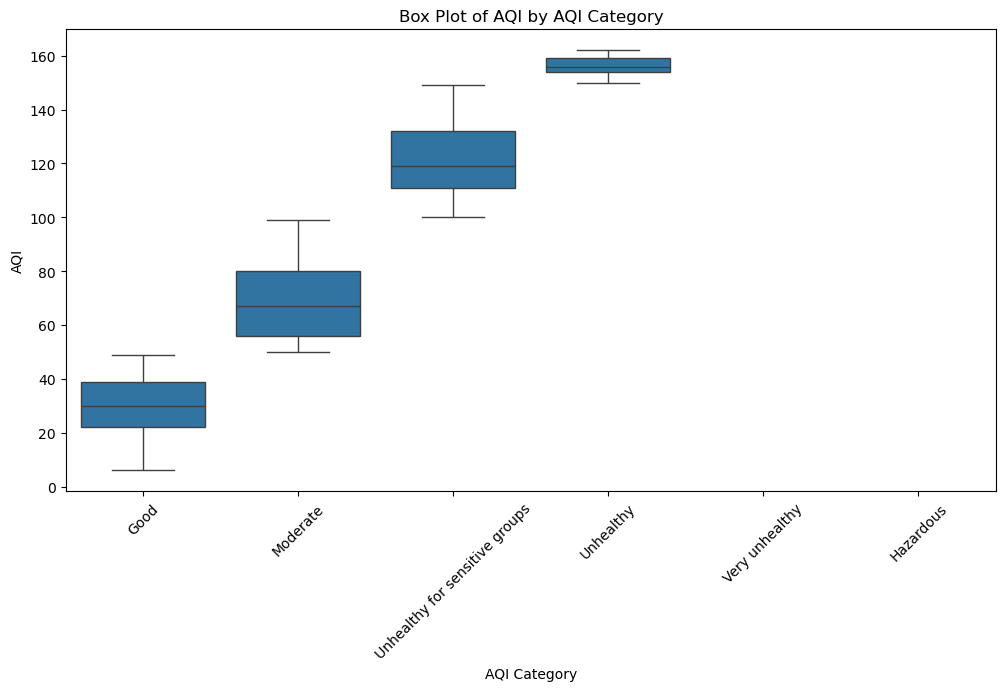

In [398]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='AQI_Category', y='AQI', data=df)
plt.title('Box Plot of AQI by AQI Category')
plt.xlabel('AQI Category')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

This code generates a box plot that shows the distribution of AQI values for each AQI category. It helps visualize the spread, median, and potential outliers of AQI values within different AQI categories, such as "Good," "Moderate," or "Unhealthy." The box plot helps in understanding how AQI levels vary across different categories.

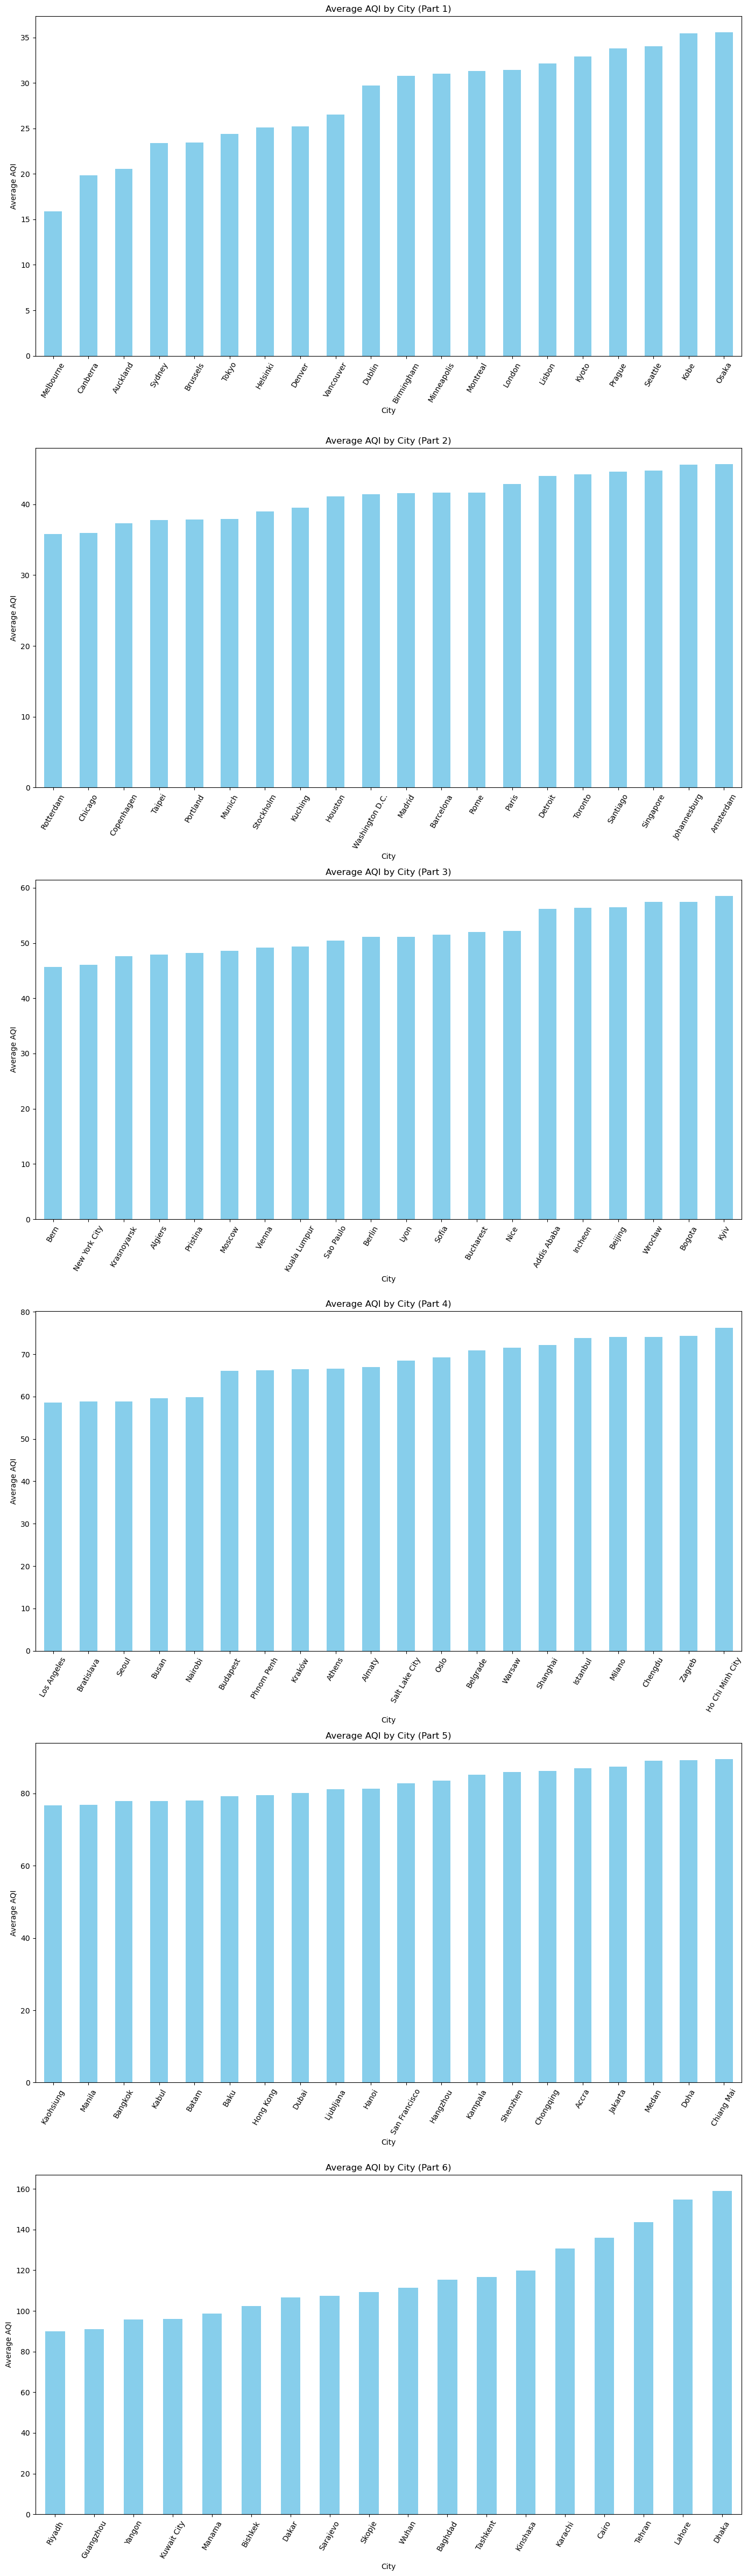

In [401]:
avg_aqi_by_city = df.groupby('City')['AQI'].mean().sort_values()

num_cities_per_plot = 20

num_plots = len(avg_aqi_by_city) // num_cities_per_plot + (len(avg_aqi_by_city) % num_cities_per_plot > 0)

plt.figure(figsize=(14, 8 * num_plots))
for i in range(num_plots):
    plt.subplot(num_plots, 1, i + 1)
    subset = avg_aqi_by_city[i*num_cities_per_plot:(i+1)*num_cities_per_plot]
    subset.plot(kind='bar', color='skyblue')
    plt.title(f'Average AQI by City (Part {i+1})')
    plt.xlabel('City')
    plt.ylabel('Average AQI')
    plt.xticks(rotation=60)
    plt.tight_layout()

plt.show()

This code generates a series of bar plots to visualize the average AQI (Air Quality Index) values for each city. The cities are grouped, and the plots display the average AQI in a segmented manner, with each plot showing a subset of cities. It helps in comparing the air quality levels across multiple cities and understanding how they vary.

## Feature Selection

In [405]:
correlation = df.select_dtypes(include=['number']).corr()

AQI_corr = correlation['AQI'].sort_values(ascending=False)

print(AQI_corr)

AQI             1.000000
PM2.5           0.982894
Weather         0.241814
PM10            0.227259
SO₂             0.038566
NO₂             0.006659
CO              0.006507
City_encoded   -0.021235
Humidity       -0.078796
O₃             -0.216908
Wind           -0.316298
Name: AQI, dtype: float64


In [407]:
df_selected = df.select_dtypes(include=['number'])

In [409]:
df_selected

Wind  Humidity  Weather  PM2.5  PM10    O₃   NO₂  SO₂     CO  AQI  \
12     7.4      0.41        2   54.0   0.0   0.0   0.0  0.0    0.0  147   
13     5.3      0.37        1   53.8   0.0   0.0   0.0  0.0    0.0  146   
15     1.6      0.61       16   50.5   0.0   0.0   0.0  0.0    0.0  138   
16    11.1      0.86        0   49.4   0.0   8.0   0.0  0.0    0.0  135   
17     3.7      0.88       24   47.0   0.0   0.0   0.0  0.0    0.0  129   
...    ...       ...      ...    ...   ...   ...   ...  ...    ...  ...   
4817   7.4      0.92        2    3.9   8.0  16.0  22.1  0.0  281.2   21   
4818  18.5      0.87        4    3.7  10.5  38.0  16.0  0.0    0.0   21   
4819  16.1      0.87        0    3.9   5.5  41.9  17.1  0.1    0.0   21   
4820  14.8      0.54        7    3.0   7.8  28.2  21.0  2.0    0.0   17   
4821   9.3      0.72       14    2.1   0.0   0.0   0.0  0.0    0.0   12   

      City_encoded  
12             107  
13              49  
15              59  
16             106  
17             116  
...            ...  
4817            96  
4818            20  
4819            41  
4820            68  
4821            72  

[3280 rows x 11 columns]

In [494]:
X = df_selected[['PM2.5']]
y = df_selected['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 score with all features: ", r2_score(y_test, y_pred))
print("MSE with all features: ", mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R2 score with all features:  0.9662785386141212
MSE with all features:  34.98360643737399
MAE: 4.611845309150912
RMSE: 5.914694111902491


In [496]:
X = df_selected[['PM2.5','PM10']]
y = df_selected['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 score with all features: ", r2_score(y_test, y_pred))
print("MSE with all features: ", mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R2 score with all features:  0.9669538298800263
MSE with all features:  34.28304000560857
MAE: 4.68277420203996
RMSE: 5.855172073099865


In [498]:
X = df_selected[['PM2.5','PM10','Weather']]
y = df_selected['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 score with all features: ", r2_score(y_test, y_pred))
print("MSE with all features: ", mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R2 score with all features:  0.9670053743613595
MSE with all features:  34.22956628961668
MAE: 4.696833091009885
RMSE: 5.850603925204361


In [500]:
X = df_selected[['PM2.5','PM10','Weather','NO₂']]
y = df_selected['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 score with all features: ", r2_score(y_test, y_pred))
print("MSE with all features: ", mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R2 score with all features:  0.967487214343806
MSE with all features:  33.72969174032563
MAE: 4.641057674451727
RMSE: 5.807726899598984


In [502]:
X = df_selected[['PM2.5','PM10','Weather','NO₂','SO₂']]
y = df_selected['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 score with all features: ", r2_score(y_test, y_pred))
print("MSE with all features: ", mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R2 score with all features:  0.9681173610193694
MSE with all features:  33.075959594987495
MAE: 4.598083994878051
RMSE: 5.75117028047227


In [504]:
X = df_selected[['PM2.5','PM10','Weather','NO₂','SO₂','CO']]
y = df_selected['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 score with all features: ", r2_score(y_test, y_pred))
print("MSE with all features: ", mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R2 score with all features:  0.9681254410674994
MSE with all features:  33.067577122456356
MAE: 4.597100854541753
RMSE: 5.75044147196164


In [506]:
X = df_selected[['PM2.5','PM10','Weather','NO₂','SO₂','CO','Humidity']]
y = df_selected['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 score with all features: ", r2_score(y_test, y_pred))
print("MSE with all features: ", mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R2 score with all features:  0.9681404351048262
MSE with all features:  33.05202188021044
MAE: 4.59550536716316
RMSE: 5.749088786947931


In [508]:
X = df_selected[['PM2.5','PM10','Weather','NO₂','SO₂','CO','Humidity','O₃']]
y = df_selected['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 score with all features: ", r2_score(y_test, y_pred))
print("MSE with all features: ", mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R2 score with all features:  0.9681550435422147
MSE with all features:  33.03686667034518
MAE: 4.586846766421757
RMSE: 5.74777058261246


In [510]:
X = df_selected.drop(columns=['AQI'])
y = df_selected['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)

lr_mae = mean_absolute_error(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("R2 score with all features: ", r2_lr )
print("MSE with all features: ", mse_lr)
print(f"MAE: {lr_mae}")
print(f"RMSE: {lr_rmse}")

R2 score with all features:  0.9682995546668377
MSE with all features:  32.8869467053774
MAE: 4.57724770195141
RMSE: 5.7347141781763975


So For feature selection, we have used the technique of Forward Selection.First we added the feature PM2.5 which is highly correlated with the target variable AQI.Then we add other feature one by one and note the r2 score and mse.AS we can see thr r2 score is constant in each iteration but the mean square error is less as compare to other when all the features were selected.And calculation of AQI also needs the value of each pollutant and meterological data.So we will be using all features to predict the target variable

## Model Training

In [514]:
# linear regression

In [516]:
# Random Forrest Regression
X = df_selected.drop(columns=['AQI'])
y = df_selected['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)

y_pred = rfr_model.predict(X_test)
r2_randomForrest = r2_score(y_test, y_pred)
mse_randomForrest = mean_squared_error(y_test, y_pred)

mae_randomForrest = mean_absolute_error(y_test, y_pred)
rmse_randomForrest = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 score: ", r2_randomForrest)
print("MSE: ", mse_randomForrest)
print(f"MAE: {mae_randomForrest}")
print(f"RMSE: {rmse_randomForrest}")

R2 score:  0.9996563818569673
MSE:  0.3564792682926829
MAE: 0.22600609756097564
RMSE: 0.5970588482659669


In [518]:
X = df_selected.drop(columns=['AQI'])
y = df_selected['AQI']

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Output the results
print("Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", cv_scores.mean())

Cross-Validation R2 Scores: [0.99949574 0.99969227 0.99961037 0.99955373 0.998462  ]
Average R2 Score: 0.9993628204718072


Cross-validation is often used to detect overfitting by providing an estimate of model performance on different subsets of the data. If the model performs well across all folds, it suggests that the model is generalizing well and is less likely to be overfitting.

In our case, the cross-validation results show an R² score close to 1 in all folds, with an average R² score of 0.9994. This indicates that the model is performing extremely well on the data and is likely not overfitting, as the R² score is very high for all folds.

In [479]:
X = df_selected.drop(columns=['AQI'])
y = df_selected['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

r2_gbr = r2_score(y_test, y_pred)
mse_gbr = mean_squared_error(y_test, y_pred)
mae_gbr = mean_absolute_error(y_test, y_pred)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred))

print("Gradient Boosting R2 score: ", r2_gbr)
print("Gradient Boosting MSE: ", mse_gbr)
print(f"MAE: {mae_gbr}")
print(f"RMSE: {rmse_gbr}")

Gradient Boosting R2 score:  0.9993276333793947
Gradient Boosting MSE:  0.6975323212633866
MAE: 0.39147880755242426
RMSE: 0.8351840044345836


In [481]:
X = df_selected.drop(columns=['AQI'])  # Features
y = df_selected['AQI']                 # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Predicting and Evaluating
y_pred = model.predict(X_test)
r2_nn = r2_score(y_test, y_pred)
mse_nn = mean_squared_error(y_test, y_pred.flatten())  # Flatten predictions for MSE calculation
mae_nn = mean_absolute_error(y_test, y_pred)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred))

print("Neural Network R2 score: ", r2_nn)
print("Neural Network MSE: ", mse_nn)
print(f"MAE: {mae_nn}")
print(f"RMSE: {rmse_nn}")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
Neural Network R2 score:  0.9974197001905498
Neural Network MSE:  2.6768766629442515
MAE: 1.0202211548642415
RMSE: 1.6361163353943544


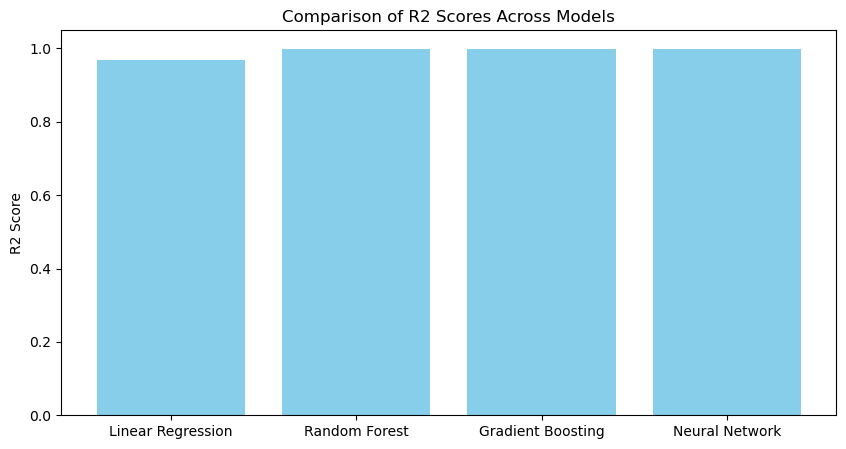

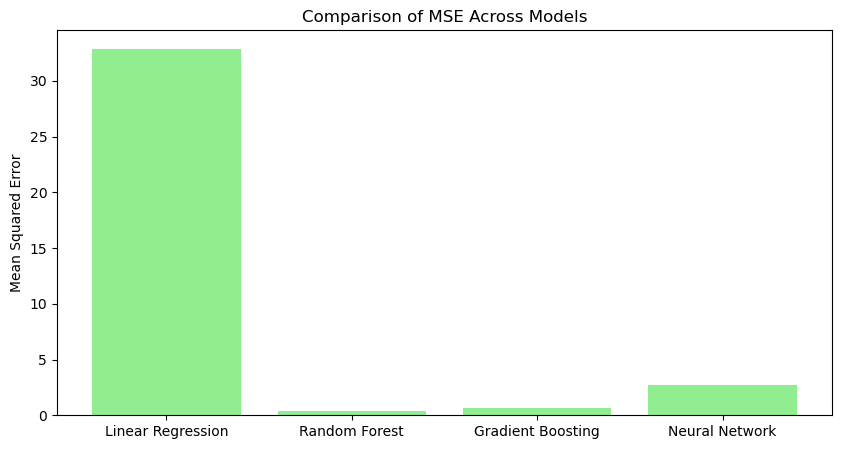

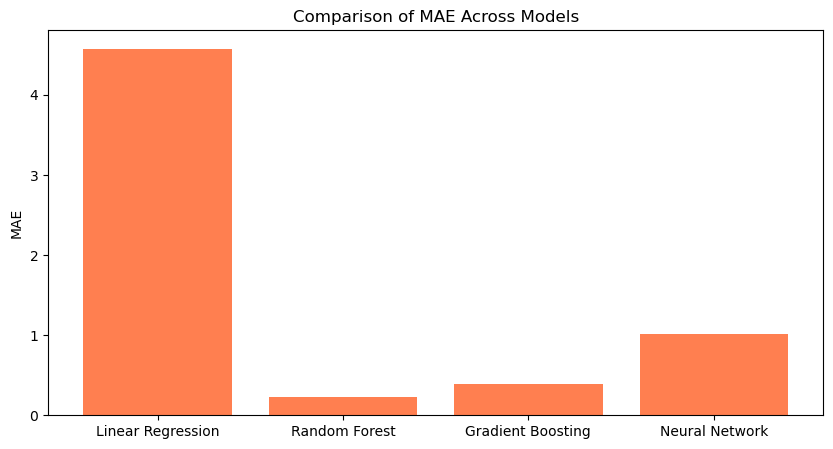

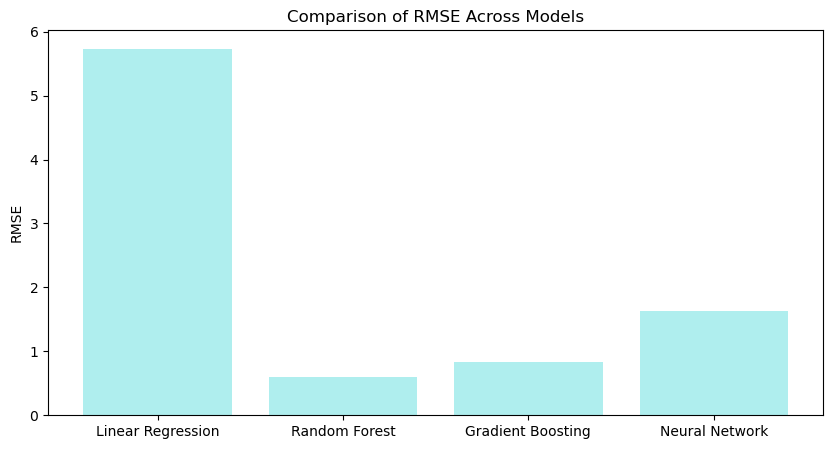

In [491]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']
r2_scores = [r2_lr, r2_randomForrest , r2_gbr, r2_nn]
mses = [mse_lr, mse_randomForrest , mse_gbr, mse_nn]
maes = [lr_mae, mae_randomForrest , mae_gbr, mae_nn]
rmses = [lr_rmse, rmse_randomForrest , rmse_gbr, rmse_nn]

# Plotting R2 Scores
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color='skyblue')
plt.title('Comparison of R2 Scores Across Models')
plt.ylabel('R2 Score')
plt.show()

# Plotting MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mses, color='lightgreen')
plt.title('Comparison of MSE Across Models')
plt.ylabel('Mean Squared Error')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(models, maes, color='coral')
plt.title('Comparison of MAE Across Models')
plt.ylabel('MAE')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(models, rmses, color='paleturquoise')
plt.title('Comparison of RMSE Across Models')
plt.ylabel('RMSE')
plt.show()


Random Forrest Regressor appears to be the best choice for your project to predict AQI from the given dataset.

**Reason for Choosing Gradient Boosting Regression**

**High Accuracy**: Random Forrest Regressor provided the highest R² score among the models, close to 0.999, indicating it can explain almost all the variance in AQI. This level of accuracy is crucial for reliable predictions.

**Low Error**: It also had the lowest Mean Squared Error (MSE),MAE,RMSE, which means its predictions are very close to the actual values, minimizing the prediction error.

In [90]:
# Input features
city = input("Enter the city name: ")
pm25 = float(input("Enter PM2.5 concentration: "))
pm10 = float(input("Enter PM10 concentration: "))
no2 = float(input("Enter NO2 concentration: "))
co = float(input("Enter CO concentration: "))
so2 = float(input("Enter SO2 concentration: "))
o3 = float(input("Enter O3 concentration: "))
humidity = float(input("Enter Humidity: "))
wind = float(input("Enter Wind speed (m/s): "))
weather = int(input("Enter Temperature (°C): "))

# Encode the city using the trained LabelEncoder
try:
    city_encoded = label_encoder.transform([city])[0]
    # print(city_encoded)
except ValueError:
    print(f"Error: '{city}' is not in the list of trained cities.")
    exit()

# Prepare the input dictionary for prediction
new_input = {
    'Wind': [wind],
    'Humidity': [humidity],
    'Weather': [weather],
    'PM2.5': [pm25],
    'PM10': [pm10],
    'O₃': [o3],
    'NO₂': [no2],
    'SO₂': [so2],
    'CO': [co],
    'City_encoded': [city_encoded]
}

# Convert to DataFrame
new_input_df = pd.DataFrame(new_input)

# Use the trained Gradient Boosting model to predict the AQI
predicted_aqi = rfr_model.predict(new_input_df)

print("\nPredicted AQI:", predicted_aqi[0])


Enter the city name:  Lahore
Enter PM2.5 concentration:  150
Enter PM10 concentration:  0
Enter NO2 concentration:  0
Enter CO concentration:  0
Enter SO2 concentration:  0
Enter O3 concentration:  0
Enter Humidity:  80
Enter Wind speed (m/s):  5.5
Enter Temperature (°C):  8


NameError: name 'label_encoder' is not defined